In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats

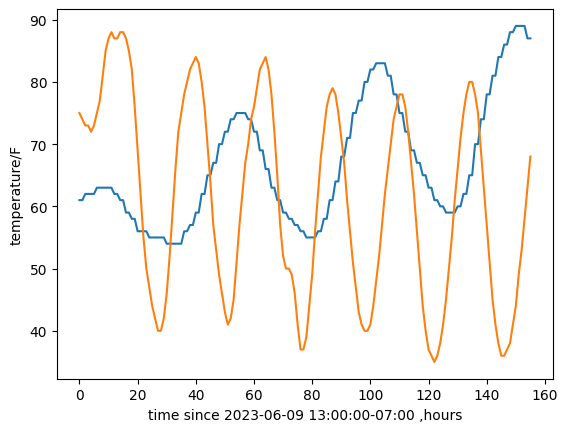

,time,temperature,humidity,shortforecast
0,2023-06-09 13:00:00-07:00 to 2023-06-09 14:00:...,61,75,Light Rain Likely
1,2023-06-09 14:00:00-07:00 to 2023-06-09 15:00:...,61,74,Chance Light Rain
2,2023-06-09 15:00:00-07:00 to 2023-06-09 16:00:...,62,73,Chance Light Rain
3,2023-06-09 16:00:00-07:00 to 2023-06-09 17:00:...,62,73,Chance Light Rain
4,2023-06-09 17:00:00-07:00 to 2023-06-09 18:00:...,62,72,Chance Light Rain
...,...,...,...,...
151,2023-06-15 20:00:00-07:00 to 2023-06-15 21:00:...,89,49,Mostly Clear
152,2023-06-15 21:00:00-07:00 to 2023-06-15 22:00:...,89,53,Mostly Clear
153,2023-06-15 22:00:00-07:00 to 2023-06-15 23:00:...,89,58,Mostly Clear
154,2023-06-15 23:00:00-07:00 to 2023-06-16 00:00:...,87,63,Mostly Clear


In [17]:
df=pd.DataFrame()
starttime=[]
endtime=[]
temperature=[]
humidity=[]
forecast=[]
response = requests.get("https://api.weather.gov/gridpoints/PQR/113,104/forecast/hourly").text
info=json.loads(response)



for i in info["properties"]["periods"]:
    starttime.append(" ".join(i["startTime"].split("T")))
    endtime.append(" ".join(i["endTime"].split("T")))
    temperature.append(i["temperature"])
    temperature.append(i["temperature"])
    humidity.append(i["relativeHumidity"]["value"])
    forecast.append(i["shortForecast"])

df = pd.DataFrame([[f"{starttime[i]} to {endtime[i]}",temperature[i],humidity[i],forecast[i]] for i in range(len(starttime))], columns=["time","temperature","humidity","shortforecast"])
# info["properties"]["periods"]
hours_total=[i for i in range(len(df["temperature"].values.tolist()))]
temp=df["temperature"].values.tolist()
start_time=df["time"].values.tolist()[0].split("to")[0]
xpoints=np.array(hours_total)
ypoints=np.array(temp)
ypoints2=np.array(humidity)
plt.plot(xpoints,ypoints,ypoints2)
plt.xlabel(f"time since {start_time},hours")
plt.ylabel(f"temperature/F")
plt.show()
# df["time"].values.tolist()[0].split("to")[0]
df



In [18]:
info["properties"]["periods"][0]["shortForecast"]


'Light Rain Likely'

Los Angeles 1


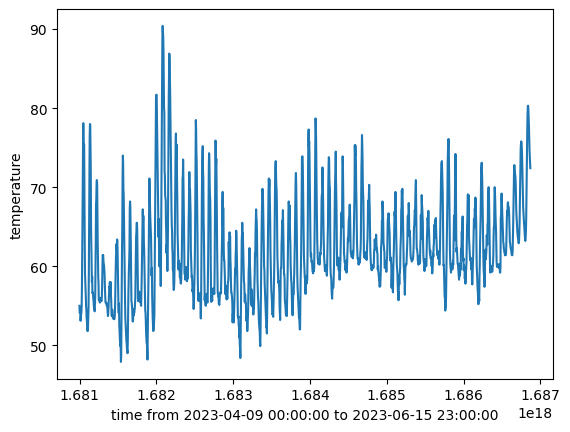

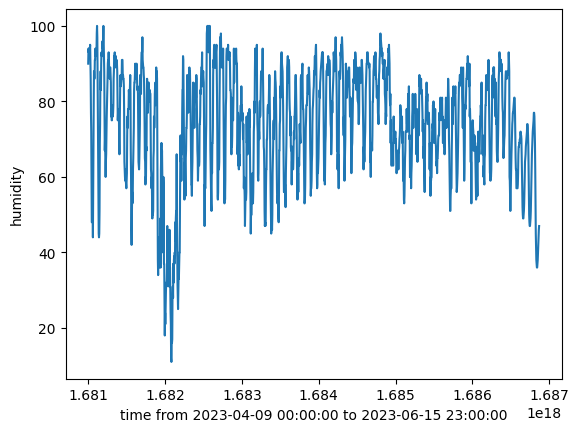

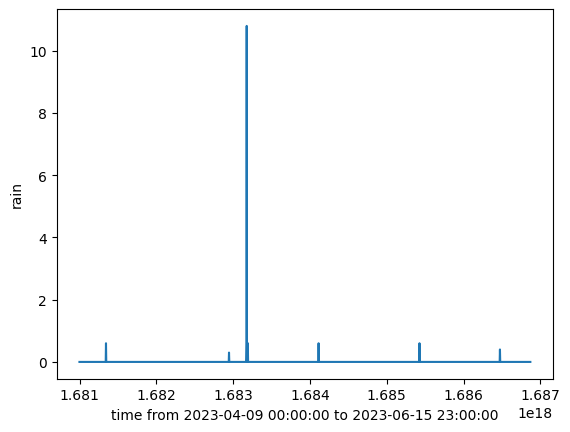

Seattle 2


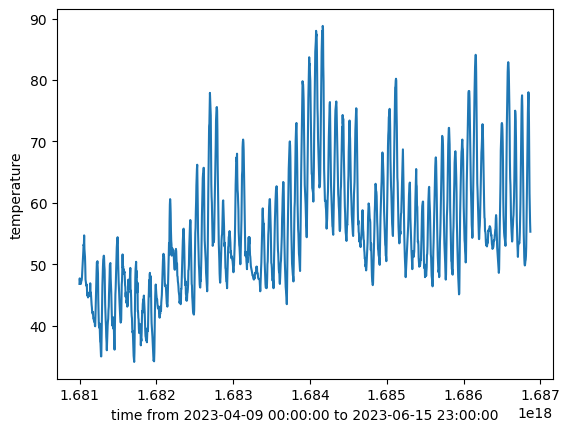

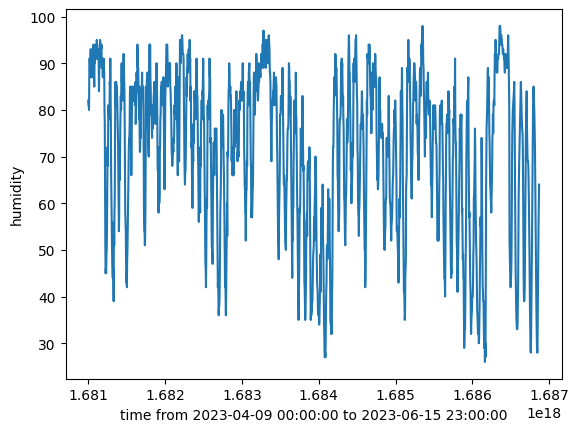

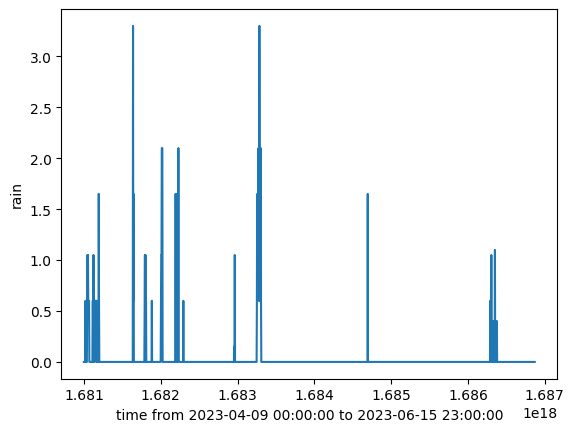

Portland 3


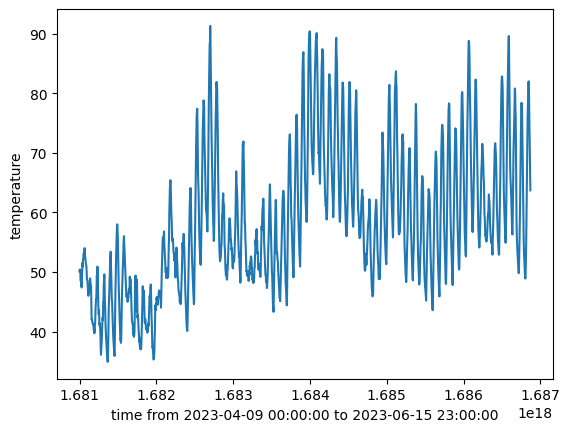

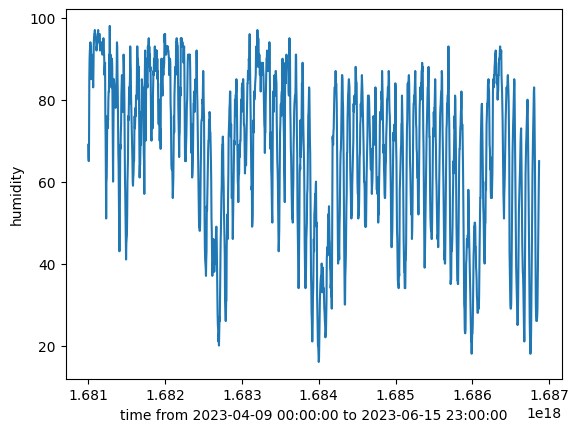

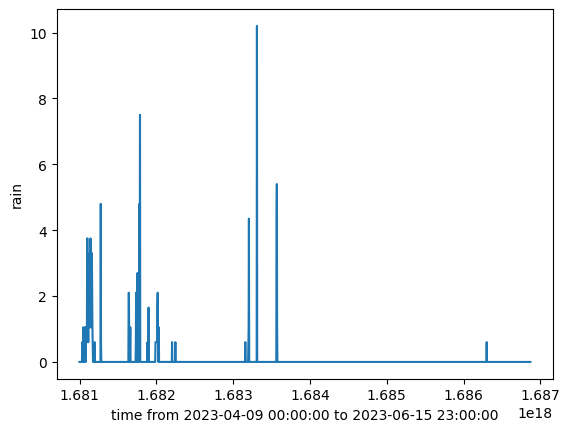

San Jose 4


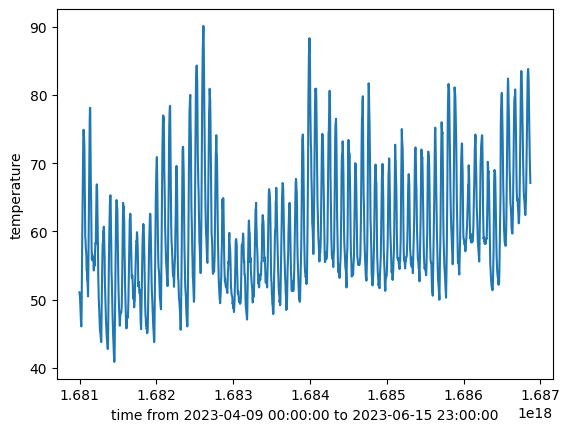

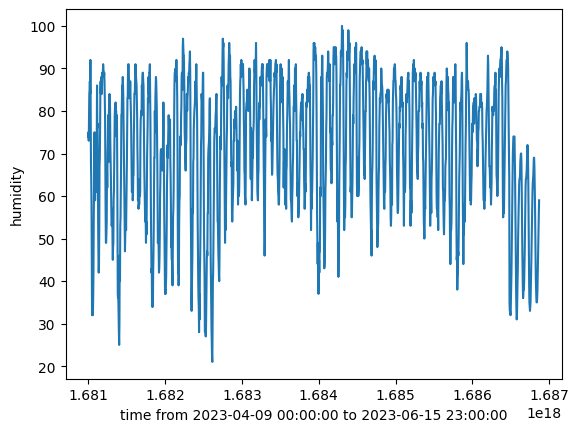

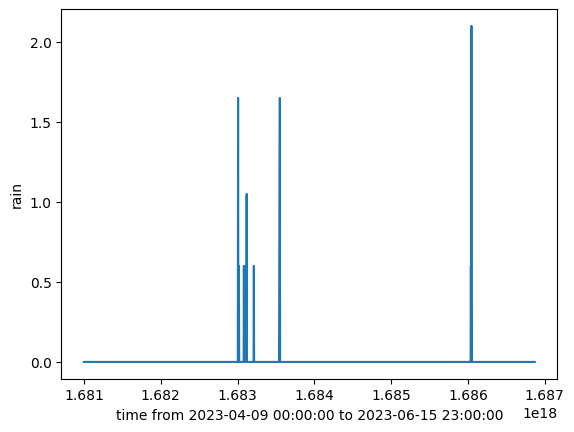

                    time  temperature  humidity  rain
0    2023-04-09 00:00:00         55.0        90   0.0
1    2023-04-09 01:00:00         54.1        94   0.0
2    2023-04-09 02:00:00         54.2        93   0.0
3    2023-04-09 03:00:00         54.2        94   0.0
4    2023-04-09 04:00:00         53.1        94   0.0
...                  ...          ...       ...   ...
1627 2023-06-15 19:00:00         76.0        40   0.0
1628 2023-06-15 20:00:00         74.7        42   0.0
1629 2023-06-15 21:00:00         73.7        44   0.0
1630 2023-06-15 22:00:00         73.0        46   0.0
1631 2023-06-15 23:00:00         72.4        47   0.0

[1632 rows x 4 columns]
                    time  temperature  humidity  rain
0    2023-04-09 00:00:00         46.8        82   0.0
1    2023-04-09 01:00:00         47.7        81   0.0
2    2023-04-09 02:00:00         47.2        81   0.0
3    2023-04-09 03:00:00         47.4        80   0.0
4    2023-04-09 04:00:00         46.8        88   0.0
...

,time,temperature,humidity,rain
0,2023-04-09 00:00:00,46.8,82,0.0
1,2023-04-09 01:00:00,47.7,81,0.0
2,2023-04-09 02:00:00,47.2,81,0.0
3,2023-04-09 03:00:00,47.4,80,0.0
4,2023-04-09 04:00:00,46.8,88,0.0
...,...,...,...,...
1627,2023-06-15 19:00:00,66.9,42,0.0
1628,2023-06-15 20:00:00,61.6,50,0.0
1629,2023-06-15 21:00:00,58.7,56,0.0
1630,2023-06-15 22:00:00,56.8,60,0.0


In [13]:

df_list=[]








def format_time(input_time):
    datetime_obj = datetime.strptime(input_time, "%Y-%m-%dT%H:%M")
    
    formatted_time = datetime_obj.strftime("%Y-%m-%d %H:%M:%S")
    
    return formatted_time

def func(url):

    df=pd.DataFrame()
    time=[]
    temperature=[]
    humidity=[]
    rain=[]


    response = requests.get(url).text
    info = json.loads(response)

    for  i in range(len(info["hourly"]["time"])):
        time.append(info["hourly"]["time"][i])
        temperature.append(info["hourly"]["temperature_2m"][i])
        humidity.append(info["hourly"]["relativehumidity_2m"][i])
        rain.append(info["hourly"]["rain"][i])



    time=[format_time(i) for i in time]
    df = pd.DataFrame([[time[i],temperature[i],humidity[i],rain[i]] for i in range(len(time))], columns=["time","temperature","humidity","rain"])
    df["time"]=pd.to_datetime(df.time)
    df_list.append(df)
    oldtime=time
    time=df["time"].values.tolist()

    for i in df.keys()[1:]:
        ypoints=np.array(df[f"{i}"].values.tolist())
        plt.plot(time,ypoints)
        plt.xlabel(f"time from {oldtime[0]} to {oldtime[-1]}")
        plt.ylabel(f"{i}")
        plt.show()
 









location_list=["https://api.open-meteo.com/v1/forecast?latitude=34.05&longitude=-118.24&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles","https://api.open-meteo.com/v1/forecast?latitude=47.61&longitude=-122.33&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles","https://api.open-meteo.com/v1/forecast?latitude=45.47&longitude=-122.75&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles","https://api.open-meteo.com/v1/forecast?latitude=37.34&longitude=-121.89&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles"]
"""main"""
namelist=["Los Angeles","Seattle","Portland","San Jose"]
for i in range(len(location_list)):
    print(namelist[i],i+1)
    func(location_list[i])
for i in df_list:
    print(i)
df_list[1]

In [10]:
location=["https://api.open-meteo.com/v1/forecast?latitude=45.47&longitude=-122.75&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles","https://api.open-meteo.com/v1/forecast?latitude=45.52&longitude=-122.68&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles","https://api.open-meteo.com/v1/forecast?latitude=45.47&longitude=-122.75&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles","https://api.open-meteo.com/v1/forecast?latitude=37.34&longitude=-121.89&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles"]
for i in location:
    print(i)

https://api.open-meteo.com/v1/forecast?latitude=45.47&longitude=-122.75&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles
https://api.open-meteo.com/v1/forecast?latitude=45.52&longitude=-122.68&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles
https://api.open-meteo.com/v1/forecast?latitude=45.47&longitude=-122.75&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles
https://api.open-meteo.com/v1/forecast?latitude=37.34&longitude=-121.89&hourly=temperature_2m,relativehumidity_2m,rain&temperature_unit=fahrenheit&past_days=61&timezone=America%2FLos_Angeles


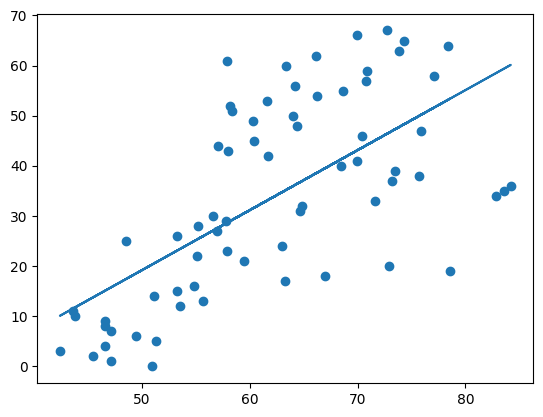

In [16]:
def myfunc(x):
  return slope * x + intercept

  
def temp_lin_func(order_of_the_city,hours):
    list1=df_list[order_of_the_city]["temperature"].values.tolist()
    templist=[]
    for i in range(24):
        templist.append(list1[i::24])
    x=templist[hours-1]
    y=[i for i in range(68)]
    
    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def myfunc(x):
      return slope * x + intercept

    mymodel = list(map(myfunc, x))

    plt.scatter(x, y)
    plt.plot(x, mymodel)
    plt.show()
temp_lin_func(2,13)




